# Libraries Import
The base class derived is `PecanEvaluator`, where is all the methods to eval the LSTM, Linear, GRU and RNN
models. Besides that, there is a prediction method, to predict the test set

In [18]:
from src.evaluator import PecanEvaluator
from src.utils.functions import *
import torch as T
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
mkdir_if_not_exists('etc/')
mkdir_if_not_exists('etc/imgs')
plt.rcParams.update({'font.size': 20})

In [3]:
df = pd.read_csv(f"data/participants_data/1min/features/661_features.csv")

In [4]:
df.head()

,Unnamed: 0,consumption,generation,time_hour,time_minute,month,day_of_week,day,week_of_year,day_sin,day_cos,year_sin,year_cos
0,0,0.691,0.0,0,0,1,0,1,1,1.000000,4.953191e-12,0.010494,0.999945
1,1,0.689,0.0,0,1,1,0,1,1,0.999990,-4.363309e-03,0.010505,0.999945
2,2,0.688,0.0,0,2,1,0,1,1,0.999962,-8.726535e-03,0.010517,0.999945
3,3,0.688,0.0,0,3,1,0,1,1,0.999914,-1.308960e-02,0.010529,0.999945
4,4,0.687,0.0,0,4,1,0,1,1,0.999848,-1.745241e-02,0.010541,0.999944


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


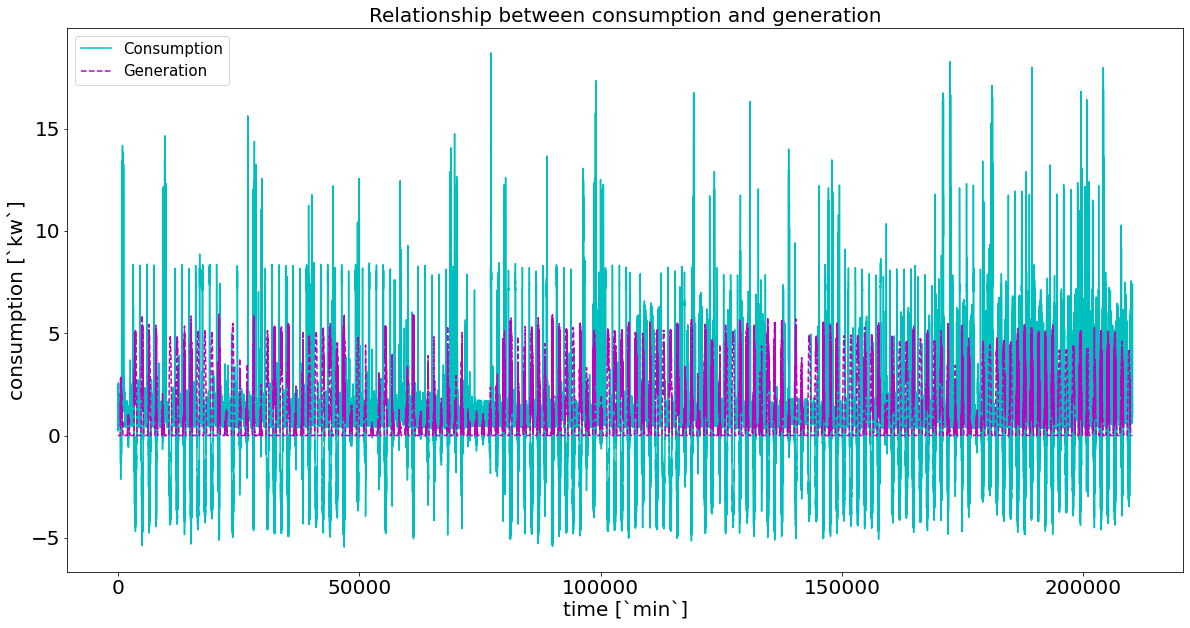

In [20]:
plt.figure(figsize=(20, 10))
plt.title(f'Relationship between consumption and generation', fontsize=20)
plt.plot(df['consumption'], 'c-', label='Consumption')
plt.plot(df['generation'], 'm--', label='Generation')

plt.xlabel('time [`min`]', fontsize=20)
plt.ylabel('consumption [`kw`]', fontsize=20)
plt.legend(fontsize=15)
plt.savefig(f'etc/imgs/consumption_generation_relation.eps', dpi=600, bbox_inches='tight')
plt.show()


The dotdict class is to use argument dictionaries.

In [3]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

# Hyper-parameters

In [4]:
device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
args = dotdict()


args['task'] = 'test'

args['participant_id'] = 'test'
args['root_path'] = 'data/participants_data/1min/'
args['bidirectional'] = False
args['use_gpu'] = True
args['sequence_length'] = 60
args['n_hidden'] = 256
args['n_layers'] = 3
args['dropout'] = 0.2

args['activation_fn'] = 'sigmoid'
args['lr'] = 1e-5
args['num_workers'] = 1
args['batch_size'] = 32
args['n_epochs'] = 200
args['early_stopping'] = False
args['patience'] = 2

args['tst_activation_fn'] ='gelu'
args['d_model'] =128
args['n_head'] =16
args['d_ffn'] =256
args['max_seq_len'] =120
args['d_k'] =32
args['d_v'] =32
args['res_dropout'] =0.1
args['fc_dropout'] =0.1


args['device'] = device

models = ["Linear", "LSTM", "RNN", "GRU", "TST", "ResNet", "ConvRNN" ]
metrics = []


# Regression metrics
For every model in the project, it's tested intended to have some basic regression metrics.

In [5]:
for model in models:
    args['model'] = model
    evaluator = PecanEvaluator(args)
    result = evaluator.eval()
    result[0]['model_name'] = model
    print("[+] - Appending result: ", result[0])
    metrics.append(result[0])

[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 13570.87it/s]


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 352


wandb: Currently logged in as: garibaldo (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\pvbr0\anaconda3\envs\energy_pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 6 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test/mape': 0.7363842129707336,
 'test/rmse': 0.11818356812000275,
 'test/test_loss': 0.03923293203115463,
 'test/val_mae': 0.11818356812000275,
 'test/val_mse': 0.03923293203115463}
--------------------------------------------------------------------------------
[+] - Appending result:  {'test/test_loss': 0.03923293203115463, 'test/val_mae': 0.11818356812000275, 'test/val_mse': 0.03923293203115463, 'test/rmse': 0.11818356812000275, 'test/mape': 0.7363842129707336, 'model_name': 'Linear'}
[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 11167.17it/s]


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 309


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\pvbr0\anaconda3\envs\energy_pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 6 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test/mape': 0.24044695496559143,
 'test/rmse': 0.047591134905815125,
 'test/test_loss': 0.005813922733068466,
 'test/val_mae': 0.047591134905815125,
 'test/val_mse': 0.005813922733068466}
--------------------------------------------------------------------------------
[+] - Appending result:  {'test/test_loss': 0.005813922733068466, 'test/val_mae': 0.047591134905815125, 'test/val_mse': 0.005813922733068466, 'test/rmse': 0.047591134905815125, 'test/mape': 0.24044695496559143, 'model_name': 'LSTM'}
[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 10660.96it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 262


C:\Users\pvbr0\anaconda3\envs\energy_pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 6 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test/mape': 0.2622535526752472,
 'test/rmse': 0.0535380095243454,
 'test/test_loss': 0.005971847102046013,
 'test/val_mae': 0.0535380095243454,
 'test/val_mse': 0.005971847102046013}
--------------------------------------------------------------------------------
[+] - Appending result:  {'test/test_loss': 0.005971847102046013, 'test/val_mae': 0.0535380095243454, 'test/val_mse': 0.005971847102046013, 'test/rmse': 0.0535380095243454, 'test/mape': 0.2622535526752472, 'model_name': 'RNN'}
[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 10911.66it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 197


C:\Users\pvbr0\anaconda3\envs\energy_pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 6 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test/mape': 0.20356127619743347,
 'test/rmse': 0.030622215941548347,
 'test/test_loss': 0.0040319617837667465,
 'test/val_mae': 0.030622215941548347,
 'test/val_mse': 0.0040319617837667465}
--------------------------------------------------------------------------------
[+] - Appending result:  {'test/test_loss': 0.0040319617837667465, 'test/val_mae': 0.030622215941548347, 'test/val_mse': 0.0040319617837667465, 'test/rmse': 0.030622215941548347, 'test/mape': 0.20356127619743347, 'model_name': 'GRU'}


In [7]:
args['model'] = 'Transformer'
evaluator = PecanEvaluator(args)
result = evaluator.eval()
result[0]['model_name'] = model
print("[+] - Appending result: ", result[0])
metrics.append(result[0])

df_metrics = pd.DataFrame(metrics)
df_metrics

[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:02<00:00, 10055.96it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 074


C:\Users\pvbr0\anaconda3\envs\energy_pytorch\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 6 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

KeyboardInterrupt: 

In [8]:
df_metrics = pd.DataFrame(metrics)
df_metrics

,test/test_loss,test/val_mae,test/val_mse,test/rmse,test/mape,model_name
0,0.039233,0.118184,0.039233,0.118184,0.736384,Linear
1,0.005814,0.047591,0.005814,0.047591,0.240447,LSTM
2,0.005972,0.053538,0.005972,0.053538,0.262254,RNN
3,0.004032,0.030622,0.004032,0.030622,0.203561,GRU


# Predictions
First of all, its necessary get the entire base and test data (10\%) of analised dataset

In [34]:
features_df = pd.read_csv(f"{args.root_path}/features/{args.participant_id}_features.csv")
n = len(features_df)

test_data = features_df[int(n * (1.0 - .1)):] # final 10% of dataset

## Linear Model

In [35]:
args['model'] = "Linear"
evaluator = PecanEvaluator(args)
result_prediction, result_label = evaluator.predict()

[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 12501.81it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 197


100%|██████████| 10451/10451 [00:09<00:00, 1149.13it/s]


Make sure that the difference between both is the sequence length of data windowing

In [36]:
len(result_prediction), len(test_data)

(10451, 10511)

Now... its time of plots

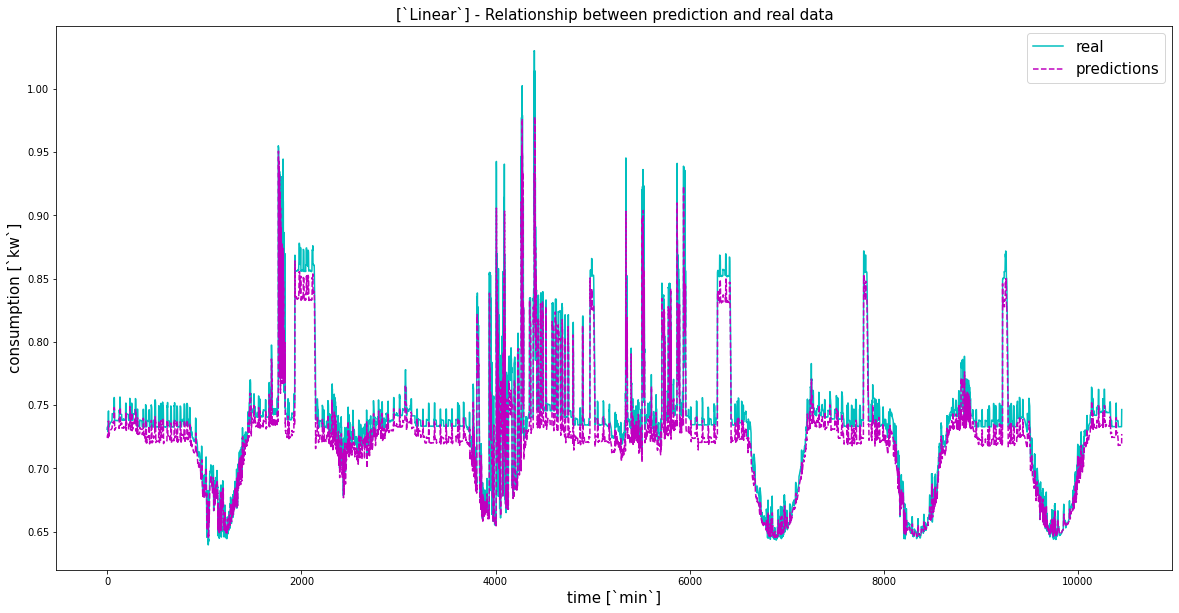

In [79]:
plt.figure(figsize=(20, 10))
plt.title('[`Linear`] - Relationship between prediction and real data', fontsize=15)
plt.plot(result_label, 'c-', label='real')
plt.plot(result_prediction, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('linear_model.png', dpi=600, bbox_inches='tight')
plt.show()

## RNN

In [67]:
args['model'] = "RNN"
evaluator = PecanEvaluator(args)
result_prediction, result_label = evaluator.predict()


[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 13062.51it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 044


100%|██████████| 10451/10451 [01:27<00:00, 118.91it/s]


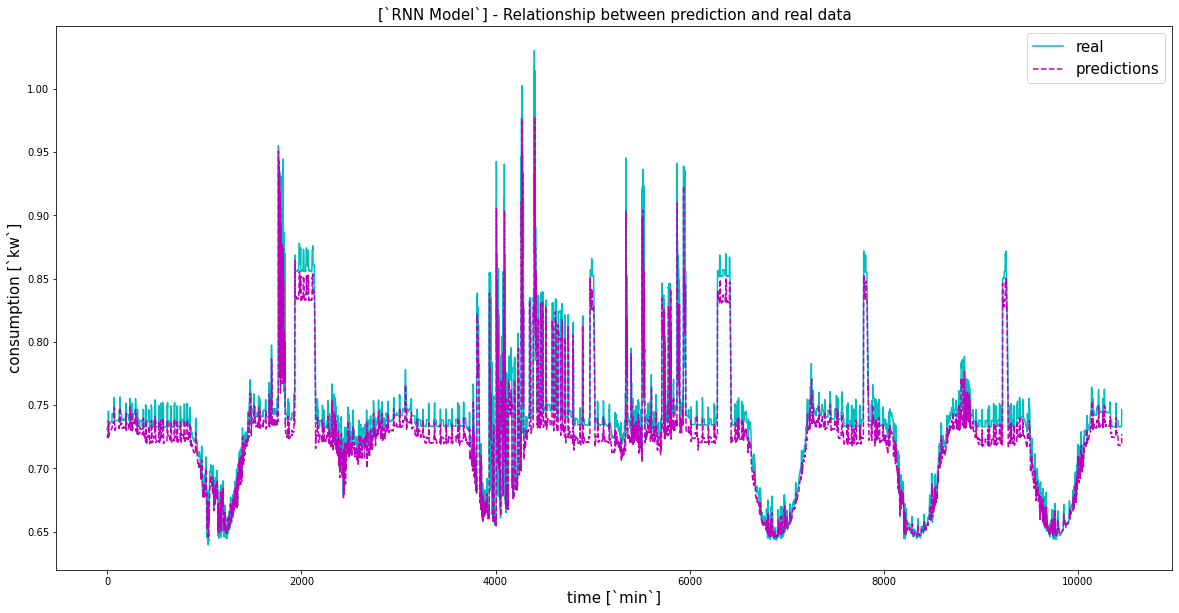

In [80]:
plt.figure(figsize=(20, 10))
plt.title('[`RNN Model`] - Relationship between prediction and real data', fontsize=15)
plt.plot(result_label, 'c-', label='real')
plt.plot(result_prediction, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('rnn_model.png', dpi=600, bbox_inches='tight')
plt.show()

## LSTM

In [ ]:
args['model'] = "LSTM"
evaluator = PecanEvaluator(args)
result_prediction, result_label = evaluator.predict()

[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 10654.71it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 138


 97%|█████████▋| 10169/10451 [03:10<00:05, 52.56it/s]

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('[`LSTM Model`] - Relationship between prediction and real data', fontsize=15)
plt.plot(result_label, 'c-', label='real')
plt.plot(result_prediction, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('lstm_model.png', dpi=600, bbox_inches='tight')
plt.show()

## GRU

In [74]:
args['model'] = "GRU"
evaluator = PecanEvaluator(args)
result_prediction, result_label = evaluator.predict()

[!] - Trainable dataframe shape - (105104, 13)
[*] Train dataframe shape: (73572, 13)
[*] Validation dataframe shape: (21021, 13)
[*] Test dataframe shape: (10511, 13)


100%|██████████| 20961/20961 [00:01<00:00, 14195.79it/s]
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


[!] Train sequence shape: (60, 13)
[!] Test sequence shape: (60, 13)
[!] Val sequence shape: (60, 13)
[!] Len of train, val and test sequence: 73512 20961 10451
[!] - Training shape:
[*] - Sequence shape: torch.Size([60, 13])
[*] - Lables shape: torch.Size([])
tensor(-0.2519)
[!] - Best Epoch - 197


100%|██████████| 10451/10451 [01:11<00:00, 145.91it/s]


In [ ]:
plt.figure(figsize=(20, 10))
plt.title('[`GRU Model`] - Relationship between prediction and real data', fontsize=15)
plt.plot(result_label, 'c-', label='real')
plt.plot(result_prediction, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('gru_model.png', dpi=600, bbox_inches='tight')
plt.show()


